Cole Reynolds A92064223, Neal Vaghasia A12743108, Alana Zaleski A12568155

Cole worked on the functions, data cleaning/pre-processing, and statistical background research. Neal worked on the visualizations and data science/python background research. Alana worked on the writing and research into stock market terminology and theory.

# Introduction and Background

The goal of this project is to check if it is feasible to create an optimal asset portfolio for any given year based off of the previous year's markets. This project will approach the problem from the perspective of someone who is willing to accept more risk in their investments. Generally speaking, young people are able to expose themselves to more risk because retirement is still far off in the future, so we can also say that this project is designed to address the investment needs of a college student about to enter the workforce.

It is well-known that entering the modern investment environment is difficult for many young people. The stock markets are, indeed, a scary place, and even more so to many current college students, who can remember the crash of 2008. Given the influence that hedge funds and other massive stock-trading organizations have on the markets, as well as the short-term variations inherent in any human-emotion driven entity like the markets, short-term investments are more akin to gambling than real investments. With this in mind, this project will attempt to develop a sound long-term trading strategy that leverages data on the previous year to predict an optimal asset portfolio for the next year.

The optimal asset portfolio will be arrived at through a method called Modern Portfolio Theory (MPT for short). MPT is based on a few foundational arguments: higher risk is associated with a greater return, an investor will only expose themselves to more risk if there is more potential for return, volatility is a good measure for risk, and that diversification lowers the risk an investor is exposed to. There are some flaws with this approach, as it is argued that volatility is not necessarily a good measure for risk and that since stock returns are not always normally distributed, some of the statistical assumptions made by MPT are not valid. Despite these flaws, MPT has remained a cornerstone of the asset management community since it was first published in 1952. 

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Data Description

This project will use two datasets: SP500.csv and prices-split-adjusted.csv

SP500.csv contains the daily price of the SP500 index since 2013. The SP500 index tracks the value of 500 large US companies with a market capitalization of at least $6 billion. It is a very standard measure of market performance, especially for large-cap stocks. This dataset has 1305 rows and two columns.

prices-split-adjusted.csv contains the daily price of each stock tracked by the SP500 index since 2010. Every stock here is large-cap and represents some of the most well-known companies in the US. The prices in this dataset are split-adjusted, meaning that even if the stock is split (a single stock becomes multiple stocks), the reported prices do not account for the split. This dataset has 851265 rows and 6 columns.

In [34]:
# Read in the S&P500 Index daily prices
sp = pd.read_csv("./SP500.csv")

# Read in the data for the daily split adjusted price for every stock in the S&P500 since 2010
all_yr = pd.read_csv("./prices-split-adjusted.csv")

# Data Cleaning/Pre-Processing

In [35]:
# Find 2015's S&P500 data
sp15 = sp[pd.DatetimeIndex(sp['DATE']).year == 2015]
sp15 = sp15.set_index('DATE')
sp15 = sp15[sp15["SP500"] != '.']
sp15['SP500'] = pd.to_numeric(sp15['SP500'])

# Find 2016's S&P500 data
sp16 = sp[pd.DatetimeIndex(sp['DATE']).year == 2016]
sp16 = sp16.set_index('DATE')
sp16 = sp16[sp16["SP500"] != '.']
sp16['SP500'] = pd.to_numeric(sp16['SP500'])

In [36]:
# Separate into 2015 and 2016 data
fifteen = all_yr[pd.DatetimeIndex(all_yr['date']).year == 2015]
sixteen = all_yr[pd.DatetimeIndex(all_yr['date']).year == 2016]

# Find all ticker symbols that existed on the S&P500 in both 2015 and 2016
names_15 = fifteen['symbol'].unique()
names_16 = sixteen['symbol'].unique()
names = list(np.intersect1d(names_15, names_16))
print(names)

['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET', 'AFL', 'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL', 'ALLE', 'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN', 'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX', 'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK', 'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH', 'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF', 'CFG', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM', 'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 'DLPH', 'DLR', 'DLTR', 'DNB', 'DOV', 'DOW', 'DPS', 

In [37]:
# Clean 2015 data
fifteen.drop(['open', 'low', 'high', 'volume'], inplace = True, axis = 1)
fifteen = fifteen.set_index('date')
sp500_15 = fifteen.pivot(columns='symbol')
sp500_15.columns = [col[1] for col in sp500_15.columns]
sp500_15.fillna(method = 'ffill', inplace = True)
sp500_15.fillna(method = 'bfill', inplace = True)
sp500_15.head()

C:\Users\ucsdnavyboy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XLNX,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,40.560001,53.910000,158.559998,109.330002,65.889999,90.459999,44.900002,88.839996,72.339996,55.540001,...,43.599998,92.830002,51.930000,13.75,38.080002,50.169998,52.012940,112.589996,28.290001,43.310001
2015-01-05,39.799999,53.880001,156.470001,106.250000,64.650002,89.690002,44.910000,87.339996,71.980003,54.529999,...,42.799999,90.290001,51.570000,13.45,35.709999,49.130001,50.956147,116.790001,27.230000,43.049999
2015-01-06,39.180000,53.040001,156.360001,106.260002,64.330002,90.180000,44.400002,86.709999,70.529999,53.250000,...,42.180000,89.809998,50.930000,13.27,35.500000,49.209999,50.330697,115.800003,26.190001,42.630001
2015-01-07,39.700001,53.009998,159.720001,107.750000,66.930000,91.980003,44.759998,88.529999,71.110001,53.810001,...,42.200001,90.720001,52.250000,13.44,35.779999,48.590000,51.998563,118.680000,26.440001,43.509998
2015-01-08,40.889999,53.660000,161.119995,111.889999,67.629997,92.190002,45.680000,89.879997,72.919998,54.759998,...,43.139999,92.230003,53.540001,13.81,36.049999,50.230000,52.904386,119.940002,26.809999,44.180000


In [38]:
# Clean 2016 data
sixteen.drop(['open', 'low', 'high', 'volume'], inplace = True, axis = 1)
sixteen = sixteen.set_index('date')
sp500_16 = sixteen.pivot(columns='symbol')
sp500_16.columns = [col[1] for col in sp500_16.columns]
sp500_16.fillna(method = 'ffill', inplace = True)
sp500_16.fillna(method = 'bfill', inplace = True)
sp500_16.head()

C:\Users\ucsdnavyboy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XLNX,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,40.689999,40.910000,152.240005,105.349998,57.610001,101.870003,42.930000,101.830002,91.970001,54.439999,...,45.799999,77.459999,58.860001,10.30,36.080002,31.400000,51.912294,101.809998,26.709999,47.270000
2016-01-05,40.549999,40.520000,151.199997,102.709999,57.369999,103.360001,42.919998,102.360001,92.339996,54.040001,...,46.480000,78.120003,60.060001,10.28,36.070000,32.200001,51.782891,103.930000,26.420000,48.009998
2016-01-06,40.730000,41.230000,147.199997,100.699997,57.380001,101.779999,42.560001,102.160004,91.019997,51.740002,...,45.630001,77.470001,59.189999,10.15,35.619999,32.160000,51.416249,104.379997,25.650000,48.020000
2016-01-07,39.000000,40.450001,148.830002,96.449997,57.209999,98.529999,41.540001,99.160004,89.110001,50.419998,...,43.830002,76.230003,58.669998,9.87,34.700001,30.160000,49.662114,101.980003,24.879999,46.560001
2016-01-08,38.590000,40.369999,145.559998,96.959999,55.650002,97.959999,40.669998,98.199997,87.849998,49.980000,...,42.930000,74.690002,56.990002,9.59,34.369999,30.629999,48.986341,101.550003,24.600000,45.880001


# Asset Selection

In [39]:
# Define a modified sum of squared errors function for daily stock returns. This tracks sustained growth 
# better than a standard SSE, so we use this for initial sharpe ratio calculation
# variance that accounts for the daily changes in price.
# Inputs: nums - a list of prices
# Returns: the modified SSE
def SSE_price(nums):
    avg = (nums[-1] - nums[0])/len(nums)
    sum_diff = 0
    for i in range(1,len(nums)):
        sum_diff = sum_diff + ((nums[i] - nums[i-1]) - avg)**2
    error = sum_diff/(len(nums) - 1)
    return error

# Define a standard sum of squared erros function. 
# Input: nums - a list of values
# Returns: the SSE
def SSE(nums):
    avg = np.sum(np.asarray(nums))/len(nums)
    sum_diff = 0
    for i in range(0,len(nums)):
        sum_diff = sum_diff + (nums[i] - avg)**2
    error = sum_diff/(len(nums))
    return error

# Define a modified sharpe ratio function. This calculates the returns over a given period minus the risk-free rate, 
# divided by the modified sum of squares error.
# Inputs: prices - a list of prices
# Returns: a Sharpe Ratio
def ratio(prices):
    error = SSE_price(prices)
    return (((((prices[-1] - prices[0])/prices[0])*100)-2.2)/error)

In [40]:
# Create a dictionary with ticker symbol as key and modified sharpe ratio as value
vals = {key: 0 for key in list(sp500_15.columns.values)}
for name in list(sp500_15.columns.values):
    vals[name] = ratio(list(sp500_15[name]))
    
# Coerce Dictionary to dataframe
stocks = pd.DataFrame(list(vals.items()), columns = ['ticker', 'ratio'])
stocks.sort_values(by=['ratio'], inplace = True, ascending = False)
stocks.head()

,ticker,ratio
68,BSX,423.580863
45,ATVI,376.291102
227,HRL,371.225323
337,NVDA,231.950428
327,NI,230.715459


In [41]:
# Define a modified clustering algorithm that minimizes the SSE of a list of numbers. 
# Input: ratios - a list of numbers sorted in descending order
#        minim - the minimum value to be allowed into the cluster
def cluster(ratios, minim):
    optimal_number = len(ratios)
    optimal_error = SSE(ratios)
    maxim = (np.asarray(ratios) > minim).sum()
    for i in range(5, maxim):
        clust = ratios[:i]
        temp_error = SSE(clust)
        if(temp_error < optimal_error):
            optimal_error = temp_error
            optimal_number = len(clust)
    return optimal_number

In [42]:
# Run the clustering algorithm on the ratios to find the asssets that are optimal
num_assets = cluster(list(stocks['ratio']), 50)
top_performers = stocks.nlargest(num_assets, 'ratio')
print(top_performers)

    ticker       ratio
68     BSX  423.580863
45    ATVI  376.291102
227    HRL  371.225323
337   NVDA  231.950428
327     NI  230.715459


In [43]:
# Create new dataframe of only assets that were optimal for 2015
asset_prices = sp500_15[list(top_performers['ticker'])]
asset_prices.head()

,BSX,ATVI,HRL,NVDA,NI
date,,,,,
2015-01-02,13.22,20.129999,25.809999,20.129999,16.679764
2015-01-05,13.81,19.850000,25.350001,19.790001,16.483302
2015-01-06,13.70,19.480000,25.160000,19.190001,16.290766
2015-01-07,14.03,19.059999,25.569999,19.139999,16.565815
2015-01-08,14.59,19.250000,25.845000,19.860001,16.868371


#### Optimal Assets 2015 Prices Time-Series Visualization

Text(0.5,1,'2015 Daily Asset Price')

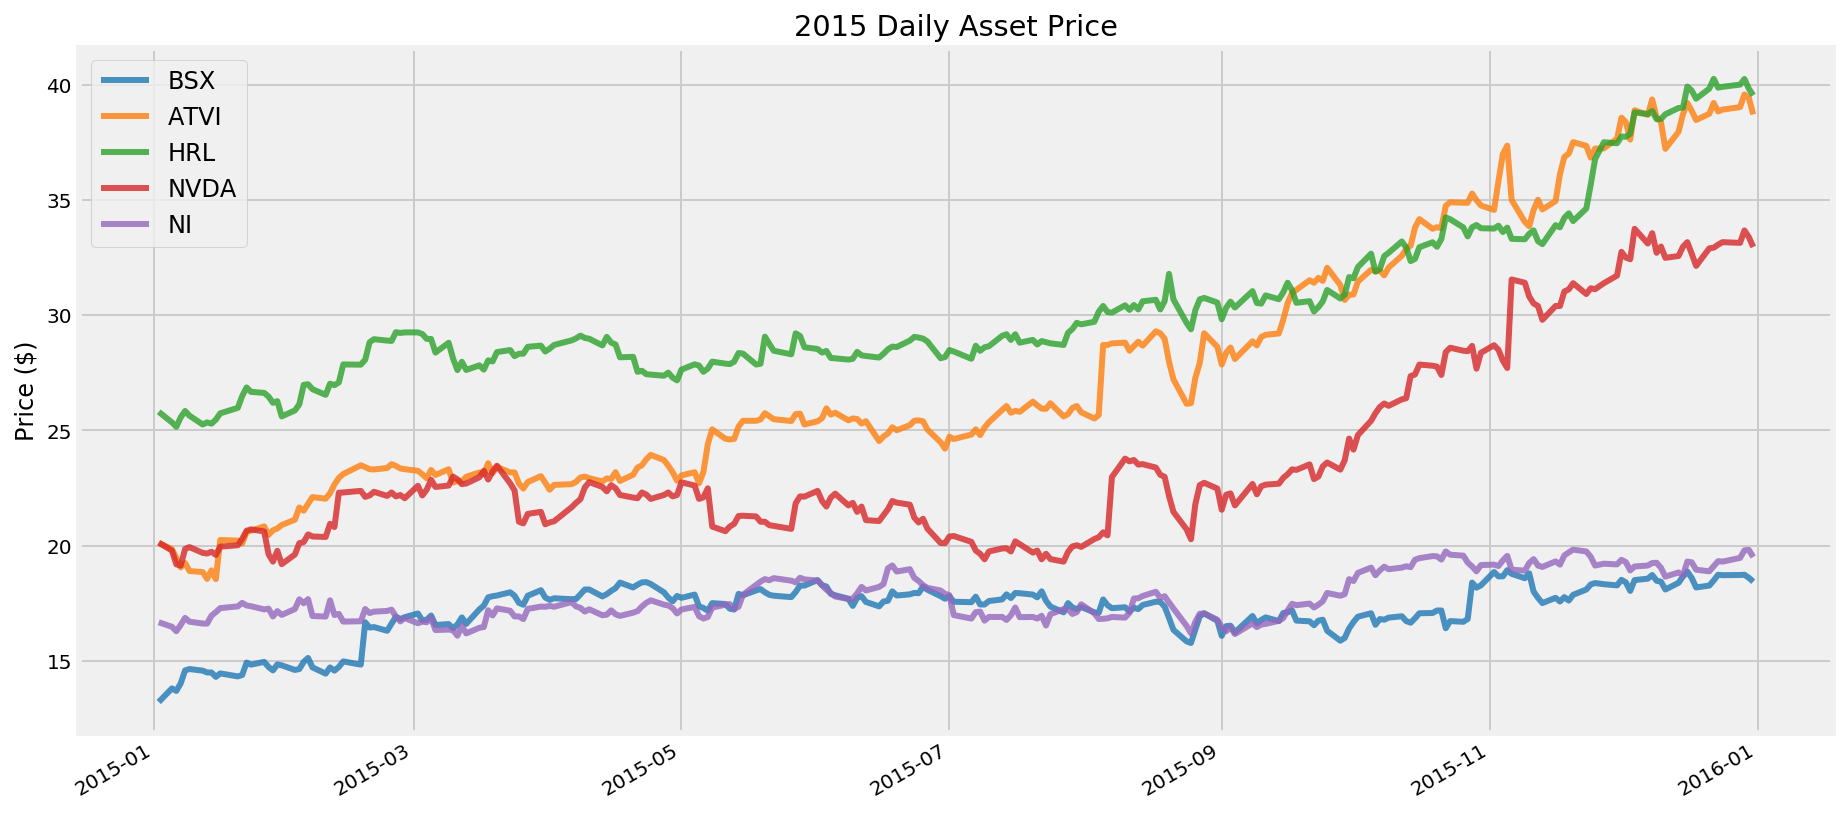

In [44]:
plt.figure(figsize=(14, 7))
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
i = 0
for symbol in asset_prices.columns.values:
    plt.plot(pd.to_datetime(asset_prices.index), asset_prices[symbol], lw=3, label = symbol, alpha=0.8, color = colors[i])
    i = i + 1
plt.gcf().autofmt_xdate()
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('Price ($)')
plt.title('2015 Daily Asset Price')

#### Optimal Assets 2015 Returns Time-Series Visualization

Text(0.5,1,'2015 Daily Asset Returns')

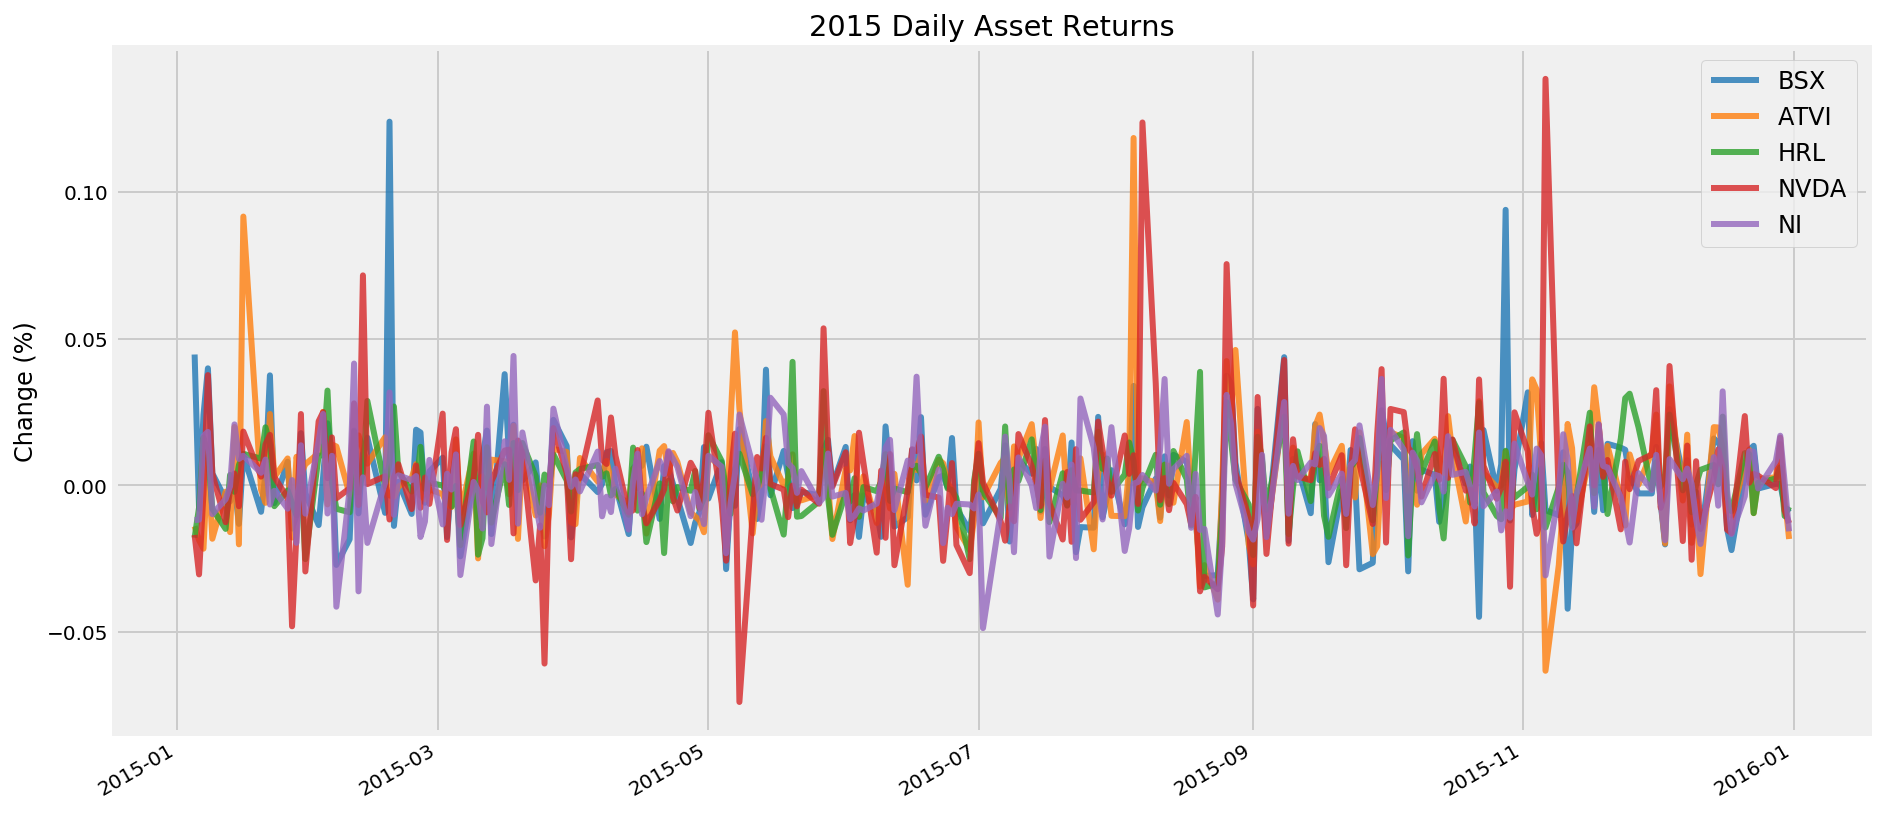

In [45]:
returns = asset_prices.pct_change()
plt.figure(figsize=(14, 7))
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
i = 0
for symbol in returns.columns.values:
    plt.plot(pd.to_datetime(returns.index), returns[symbol], lw=3, alpha=0.8, label=symbol, color = colors[i])
    i = i +1
plt.gcf().autofmt_xdate()
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('Change (%)')
plt.title('2015 Daily Asset Returns')

# Portfolio Optimization

In [46]:
# Find the mean returns and the covariance matrix
mean_returns = returns.mean()
cov_matrix = returns.cov()

In [47]:
# Define a function that calculates the performance of a portfolio with given parameters
# Inputs: weights - the percentage of each asset in the total portfolio
#         mean_returns - the mean returns for each asset
#         cov_matrix - the covariance matrix
# Returns: std - the standard deviation of the portfolio
#          returns - the portfolio's returns over the year
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights)*252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns

# Define a function that randomly simulates a lot of portfolios
# Inputs: num_portfolios - the number of portfolios to simulate
#         num_assets - how many assets the portfolio contains
#         mean_returns - the mean returns for each asset
#         cov_matrix - the covariance matrix
#         risk_free_rate - the return you can get without risk
# Returns: results - array containing the standard deviation, returns, and sharpe ratios
#          weights_record - a list of what the different weightings were for each portfolio
def random_portfolios(num_portfolios, num_assets, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(1,num_portfolios):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

# Define a function that optimizes the weightings of assets in a portfolio and visualizes it
# Inputs: table - a dataframe with asset prices
#         mean_returns - the mean returns for each stock
#         cov_matrix - the covariance matrix
#         num_portfolios - the number of portfolios to simulate
#         risk_free_rate - the return you can get without risk
# Returns: max_sharpe_allocation - the allocation percentages for each asset
def display_simulated_ef_with_random(table, mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns.shape[0],mean_returns, cov_matrix, risk_free_rate)
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    print("-"*80)
    print("Maximum Sharpe Ratio Portfolio Allocation\n") 
    print("Annualised Return:",round(rp,2))
    print("Annualised Volatility:", round(sdp,2)) 
    print("\n") 
    print(max_sharpe_allocation) 
    print("-"*80) 
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.1)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe Ratio', )
    plt.title('Simulated Portfolio Optimization')
    plt.xlabel('Annualised Volatility')
    plt.ylabel('Annualised Returns')
    plt.legend(labelspacing=0.8, bbox_to_anchor = (0.34,0.95))
    return max_sharpe_allocation

## these functions were taken from source one and slightly modified

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.56
Annualised Volatility: 0.18


              BSX   ATVI    HRL   NVDA    NI
allocation  14.81  32.99  18.58  20.82  12.8
--------------------------------------------------------------------------------


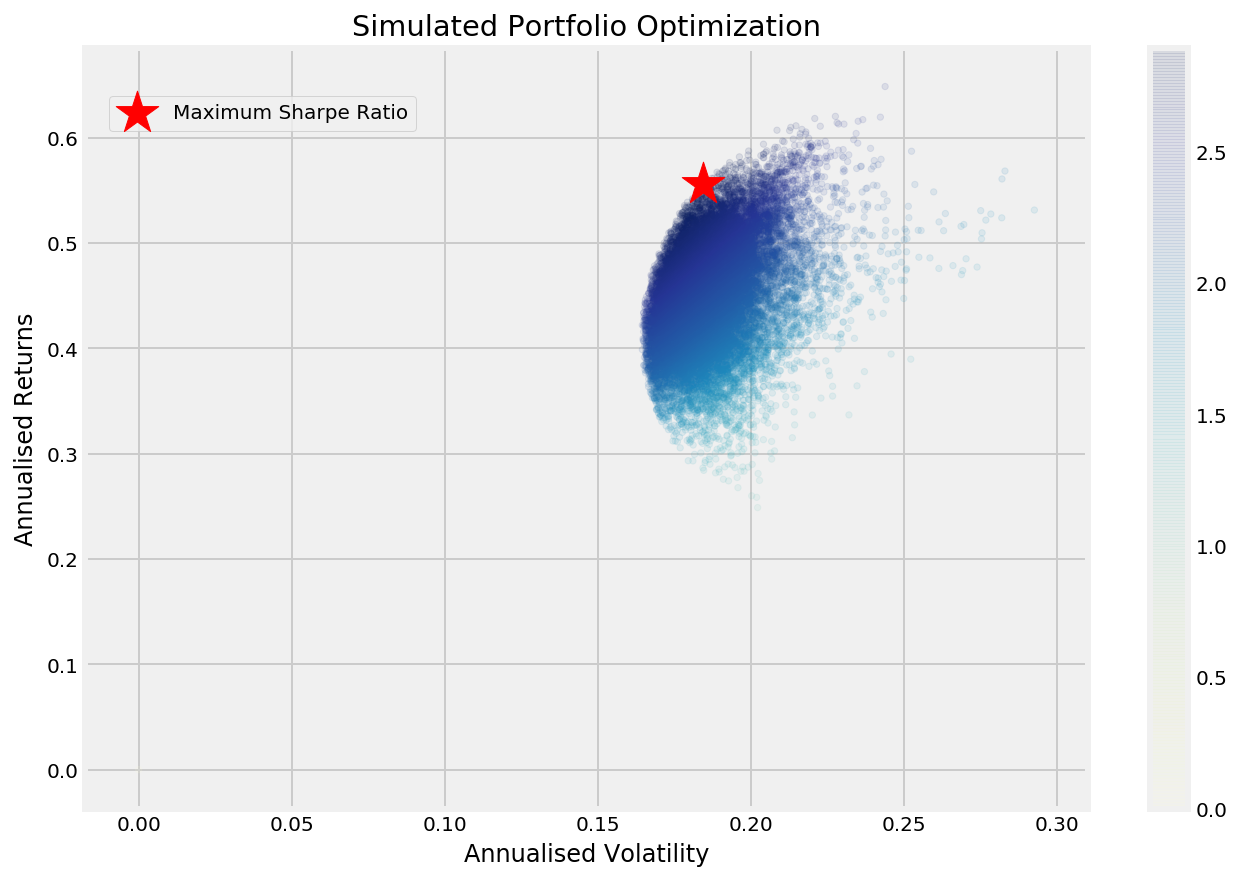

In [48]:
allocation = display_simulated_ef_with_random(asset_prices, mean_returns, cov_matrix, 25000, 0.022)
allocation = list(allocation.iloc[0])

In [49]:
# Set how much funds the user has for investing
available_funds = 10000

In [50]:
# Define a function that determines how much of each asset should be bought for the portfolio
# Input: weights - the weightings of each asset in the portfolio
#        buy - the purchase price
#        available_funds - funds that the user will invest
# Returns: num - the number of each asset to buy
#          extra - unused money from buying each asset
def num_purchase(weights, buy, available_funds):
    percent = np.asarray(weights)/100
    buy = np.asarray(buy)
    allocated = percent*available_funds
    num = (np.divide(allocated, buy) - 0.5).round()
    extra = allocated - (np.multiply(num,buy))
    return num, extra

In [51]:
# Create a dataframe that stores the weighting, number bought, the purchase price, and the amount of unused money
# in the transaction for each ticker symbol in our asset portfolio
assets = pd.DataFrame(index = returns.columns.values, columns = ["weight", "number", "buy", "unused"])
assets["weight"] = allocation
assets['buy'] = asset_prices.iloc[0,:]
assets['number'], assets['unused'] = num_purchase(assets['weight'], assets['buy'], available_funds)
print(assets)

      weight  number        buy     unused
BSX    14.81   112.0  13.220000   0.360000
ATVI   32.99   163.0  20.129999  17.810163
HRL    18.58    71.0  25.809999  25.490035
NVDA   20.82   103.0  20.129999   8.610103
NI     12.80    76.0  16.679764  12.337917


In [52]:
# Create a dataframe that tracks the performance of the optimized asset portfolio and the S&P500 Index. 
portfolio_price = pd.DataFrame(index = returns.index, columns = ["assets"])
for i in range(0,len(portfolio_price)):
    price = list(asset_prices.iloc[i,:])
    num = list(assets['number'])
    portfolio_price.iloc[i,0] = np.sum(np.multiply(np.asarray(num),np.asarray(price)))
portfolio_price = pd.merge(portfolio_price, sp15, left_index = True, right_index = True)
portfolio_price['asset_change'] = (np.asarray(portfolio_price['assets']) - portfolio_price.iloc[0,0])/portfolio_price.iloc[0,0]
portfolio_price['SP500_change'] = (np.asarray(portfolio_price['SP500']) - portfolio_price.iloc[0,1])/portfolio_price.iloc[0,1]
portfolio_price.head()

,assets,SP500,asset_change,SP500_change
date,,,,
2015-01-02,9935.39,2058.20,0,0.000000
2015-01-05,9873.22,2020.58,-0.0062575,-0.018278
2015-01-06,9710.67,2002.61,-0.0226185,-0.027009
2015-01-07,9724.03,2025.90,-0.0212735,-0.015693
2015-01-08,9934.4,2062.14,-9.96995e-05,0.001914


#### Optimal Portfolio and SP500 2015 Prices Time-Series Visualization

Text(0.5,1,'2015 Portfolio Peformance')

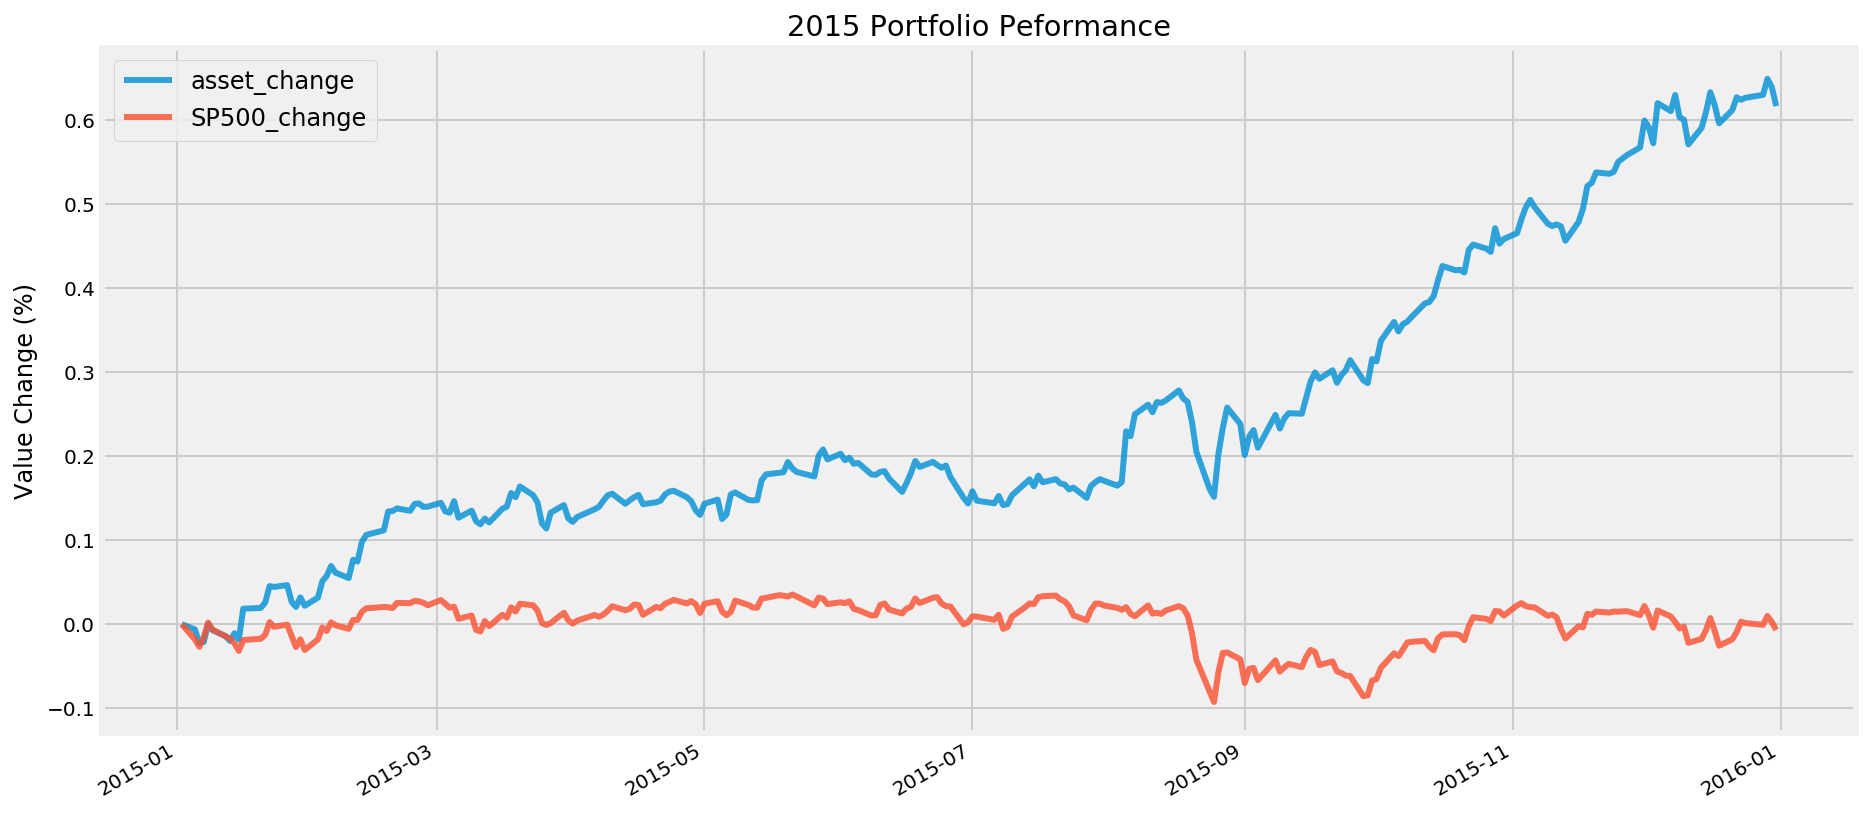

In [53]:
plt.figure(figsize=(14, 7))
for symbol in ['asset_change','SP500_change']:
    plt.plot(pd.to_datetime(portfolio_price.index), portfolio_price[symbol], lw=3, label = symbol, alpha=0.8)
plt.gcf().autofmt_xdate()
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('Value Change (%)')
plt.title('2015 Portfolio Peformance')

# Optimized Portfolio Testing

We now treat the asset allocations derived in the Portfolio Optimization step as a prediction of what the optimal asset allocations will be in 2016. 

In [54]:
# Create new dataframe of only assets that we will invest in for 2016
asset_prices = sp500_16[list(top_performers['ticker'])]
asset_prices.head()

,BSX,ATVI,HRL,NVDA,NI
date,,,,,
2016-01-04,17.990000,37.619999,39.110000,32.369999,19.520000
2016-01-05,18.180000,37.139999,39.904999,32.889999,19.830000
2016-01-06,18.000000,36.790001,40.040001,31.530001,19.940001
2016-01-07,17.639999,36.270000,39.314999,30.280001,19.500000
2016-01-08,17.430000,35.709999,39.084999,29.629999,19.469999


#### Predicted Optimal Assets 2016 Prices Time-Series Visualization

Text(0.5,1,'2016 Daily Asset Price')

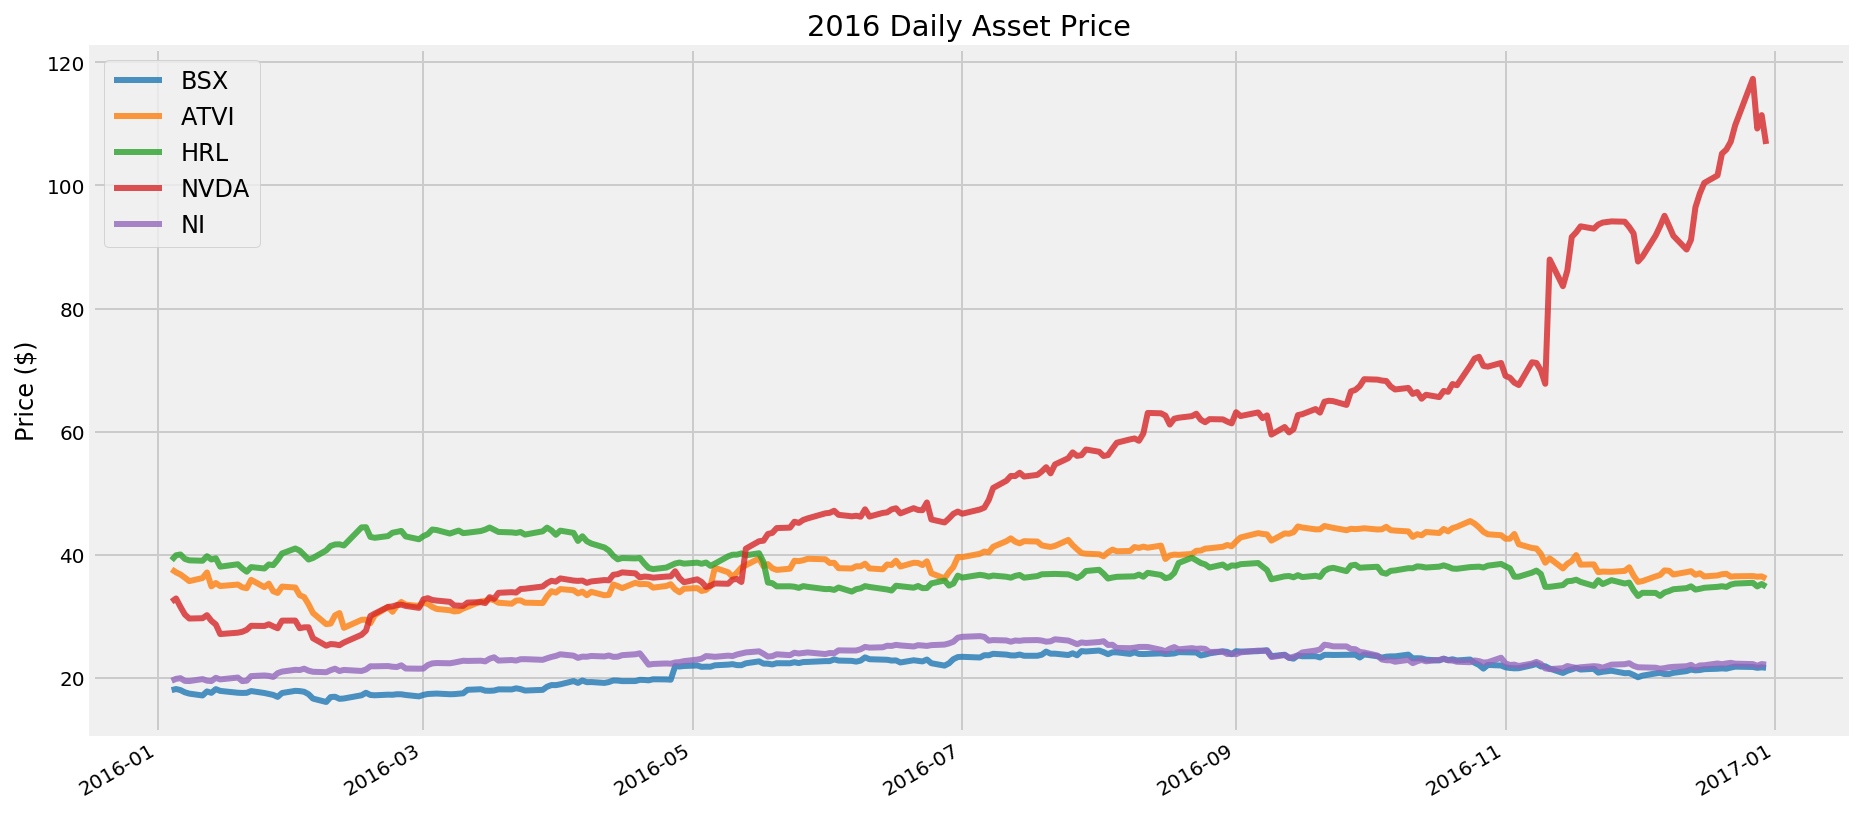

In [55]:
plt.figure(figsize=(14, 7))
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
i = 0
for symbol in asset_prices.columns.values:
    plt.plot(pd.to_datetime(asset_prices.index), asset_prices[symbol], lw=3, label = symbol, alpha=0.8, color = colors[i])
    i = i + 1
plt.gcf().autofmt_xdate()
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('Price ($)')
plt.title('2016 Daily Asset Price')

#### Predicted Optimal Assets 2016 Returns Time-Series Visualization

Text(0.5,1,'2016 Daily Asset Returns')

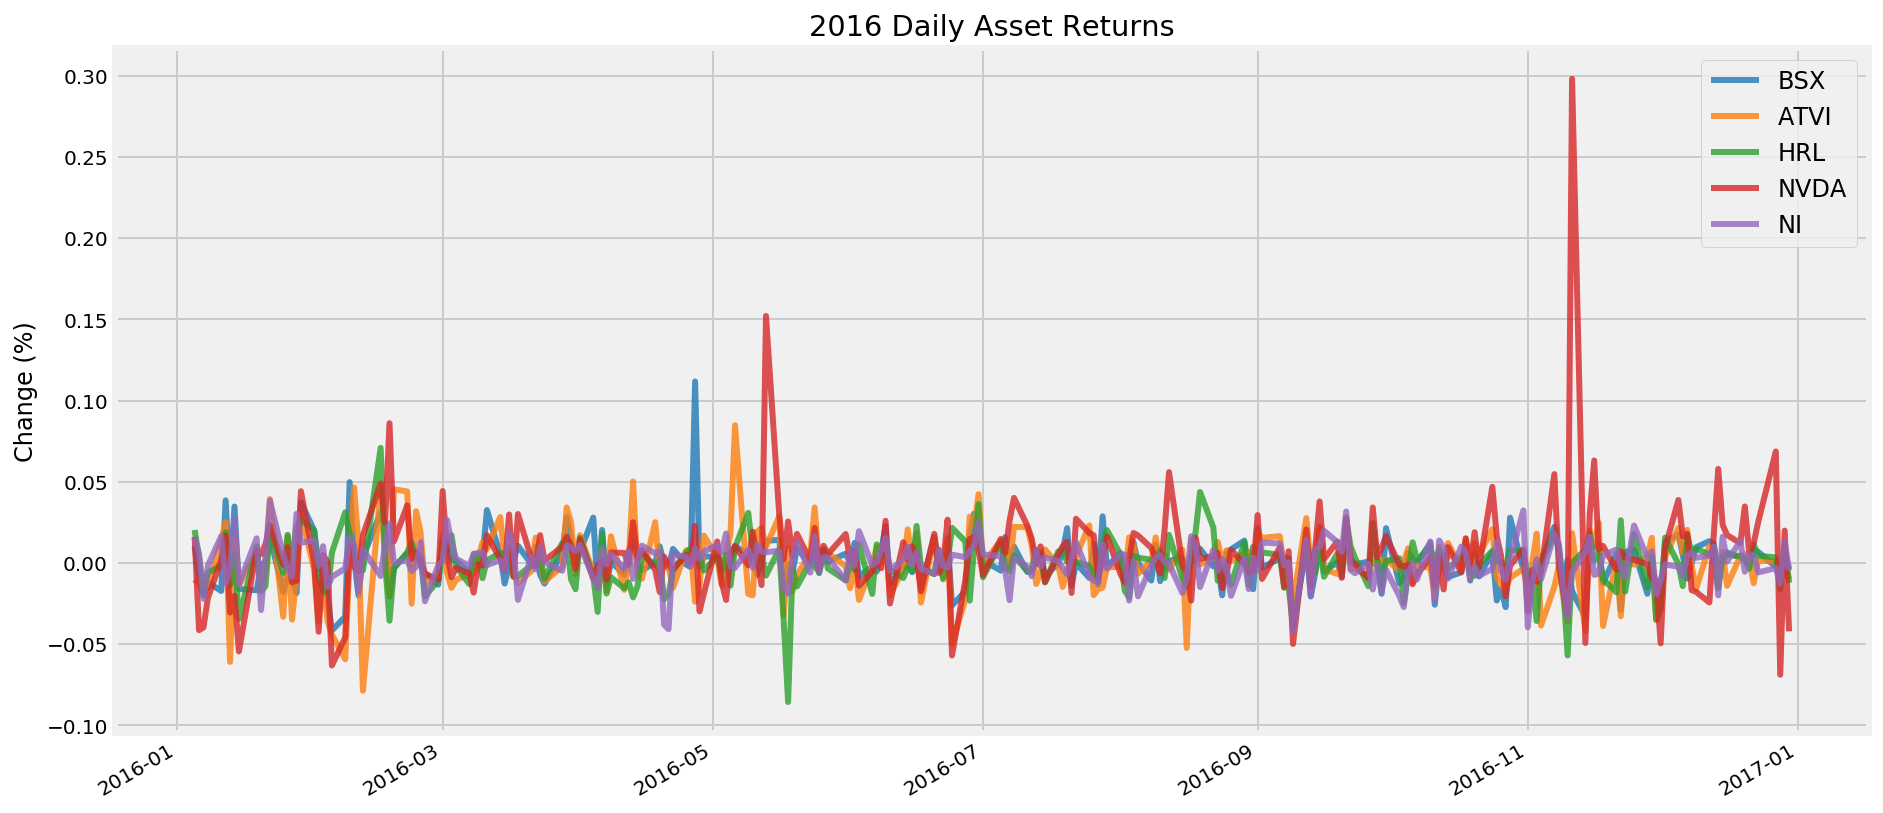

In [56]:
returns = asset_prices.pct_change()
plt.figure(figsize=(14, 7))
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
i = 0
for symbol in returns.columns.values:
    plt.plot(pd.to_datetime(returns.index), returns[symbol], lw=3, alpha=0.8, label=symbol, color = colors[i])
    i = i +1
plt.gcf().autofmt_xdate()
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('Change (%)')
plt.title('2016 Daily Asset Returns')

In [57]:
# Create a dataframe that stores the weighting, number bought, the purchase price, and the amount of unused money
# in the transaction for each ticker symbol in our asset portfolio
assets = pd.DataFrame(index = returns.columns.values, columns = ["weight", "number", "buy", "unused"])
assets["weight"] = allocation
assets['buy'] = asset_prices.iloc[0,:]
assets['number'], assets['unused'] = num_purchase(assets['weight'], assets['buy'], available_funds)
print(assets)

      weight  number        buy     unused
BSX    14.81    82.0  17.990000   5.820000
ATVI   32.99    87.0  37.619999  26.060087
HRL    18.58    47.0  39.110000  19.829977
NVDA   20.82    64.0  32.369999  10.320064
NI     12.80    65.0  19.520000  11.200000


In [58]:
# Create a dataframe that tracks the performance of the optimized asset portfolio and the S&P500 Index. 
portfolio_price = pd.DataFrame(index = returns.index, columns = ["assets"])
for i in range(0,len(portfolio_price)):
    price = list(asset_prices.iloc[i,:])
    num = list(assets['number'])
    portfolio_price.iloc[i,0] = np.sum(np.multiply(np.asarray(num),np.asarray(price)))
portfolio_price = pd.merge(portfolio_price, sp16, left_index = True, right_index = True)
portfolio_price['asset_change'] = (np.asarray(portfolio_price['assets']) - portfolio_price.iloc[0,0])/portfolio_price.iloc[0,0]
portfolio_price['SP500_change'] = (np.asarray(portfolio_price['SP500']) - portfolio_price.iloc[0,1])/portfolio_price.iloc[0,1]
portfolio_price.head()

,assets,SP500,asset_change,SP500_change
date,,,,
2016-01-04,9926.77,2012.66,0,0.000000
2016-01-05,9991.38,2016.71,0.00650916,0.002012
2016-01-06,9872.63,1990.26,-0.0054539,-0.011130
2016-01-07,9655.19,1943.09,-0.0273578,-0.034566
2016-01-08,9534.89,1922.03,-0.0394766,-0.045030


#### Predicted Optimal Portfolio and SP500 2016 Prices Time-Series Visualization

Text(0.5,1,'2016 Portfolio Peformance')

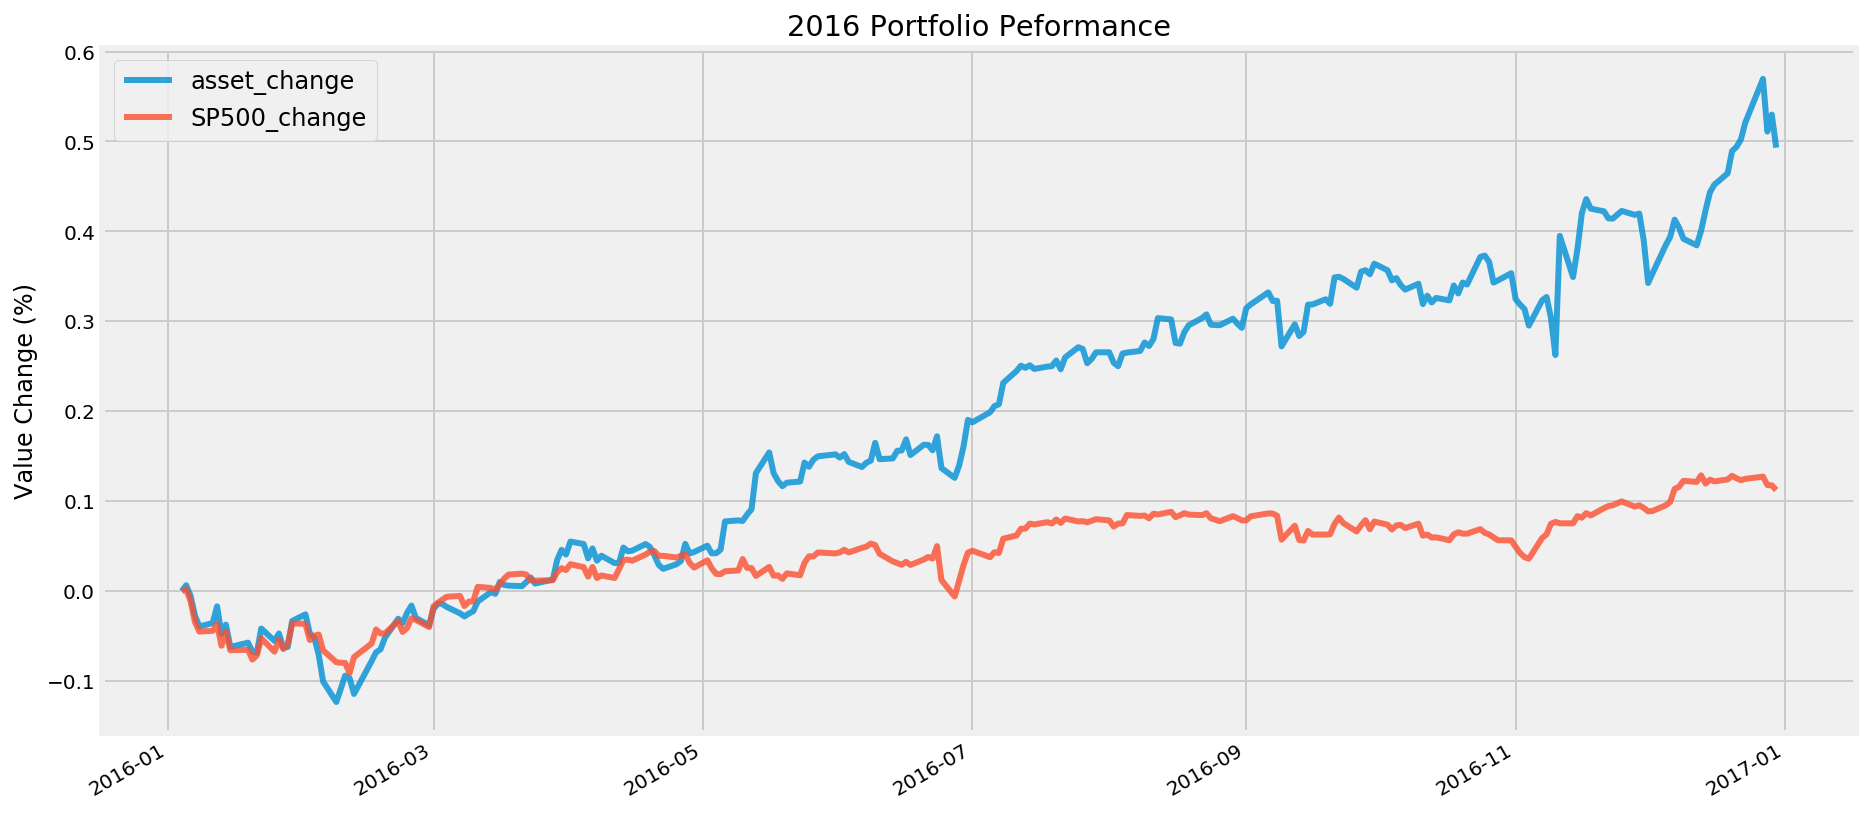

In [59]:
plt.figure(figsize=(14, 7))
for symbol in ['asset_change','SP500_change']:
    plt.plot(pd.to_datetime(portfolio_price.index), portfolio_price[symbol], lw=3, label = symbol, alpha=0.8)
plt.gcf().autofmt_xdate()
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('Value Change (%)')
plt.title('2016 Portfolio Peformance')

# Analysis of Results

From the plot "2016 Portfolio Performance" created in the Optimized Portfolio Testing step, it is clear that our portfolio optimization method created an asset allocation on appropriate stocks such that our returns in 2016 vastly outperformed the market (given by the SP500 index). Our portfolio experienced a return of 50% while the SP500 index experienced a return of 11.2%. 

However, it is necessary to point out that a majority of the returns experienced by the portfolio were due to NVDA (company name - NVIDIA), which experienced an unprecedented growth of 229%, mainly due to the failures of one of its competitors, AMD. Without NVDA's growth rate, the returns of the portfolio would have been much more modest. 

One extremely interesting feature that can be seen in the plot "2016 Portfolio Performance" is that both the portfolio and the SP500 follow somewhat similar variation trends. This can be seen by looking at the variation in the SP500 index line and observing the variation in the asset line at the same x-axis location. This similarity shows that even though our portfolio outperforms the market, it is still subjected to its short-term variation.

# Privacy/Ethics Considerations

The primary concern for this project in regards to ethics is that some people may take the method outlined in this project as a guaranteed way to make money. This is absolutely not true, as it is widely known in financial academia that past asset performance does not guarantee future asset performance. Any investment in the stock market carries significant risk, and any potential investor needs to remember that there is a possibility that they could lose all of their investment. 

There are no privacy concerns for this project, as all of the data only pertains to stock performance. 

# Conclusions and Discussion

We were able to successfully generate a strong asset portfolio for 2016 based off of the price history for stocks in 2015. 

Even though our portfolio outperformed the market (given by the SP500), this does not necessarily mean that this method will always work. It is necessary to acknowledge that unpredictable factors will always affect the market, and in this case they just so happened to benefit our portfolio.

A good way to describe the portfolio optimization method outlined in this project is that it picks assets with a lot of momentum (strong upward trend). This momentum positions the asset to continue rising in price, but it can be dampened or even reversed by unpredictable events or market factors. We can see this dampening effect occuring in 4 of the 5 assets that were contained in our portfolio, while 1 of the 5 experienced a massive upswing. 

In conclusion, this method of portfolio optimization is better than just randomly choosing stocks, but it is not guaranteed to outperform the market. A college student, or anybody, who is willing to accept risk and prefers to not actively manage their assets might find this method helpful to break into the world of investing.

To better test this method, a team could iterate through every year of SP500 data available, generate optimal portfolios for each year, and check the performance of each portfolio on the next year. A test like this would involve enormous amounts of data that are not publicly available, but would provide a large sample space of results, which could help us better understand the effectiveness of this method. 

# Sources

https://towardsdatascience.com/efficient-frontier-portfolio-optimisation-in-python-e7844051e7f

http://dacatay.com/data-science/portfolio-optimization-python/